<a href="https://colab.research.google.com/github/ricacero/Datascience300/blob/main/taller21000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from google.colab import drive
import pandas as pd
import numpy as np
import os
import time
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/Bootcamp semana 6'

/content/gdrive/MyDrive/Bootcamp semana 6


In [3]:
%%time
dat = pd.read_csv('YENALDOLLAR.csv',sep=";")

CPU times: user 8.06 ms, sys: 973 µs, total: 9.03 ms
Wall time: 210 ms


In [4]:
print(dat.keys())

Index(['FECHA', 'JPUS', 'TASAINF'], dtype='object')


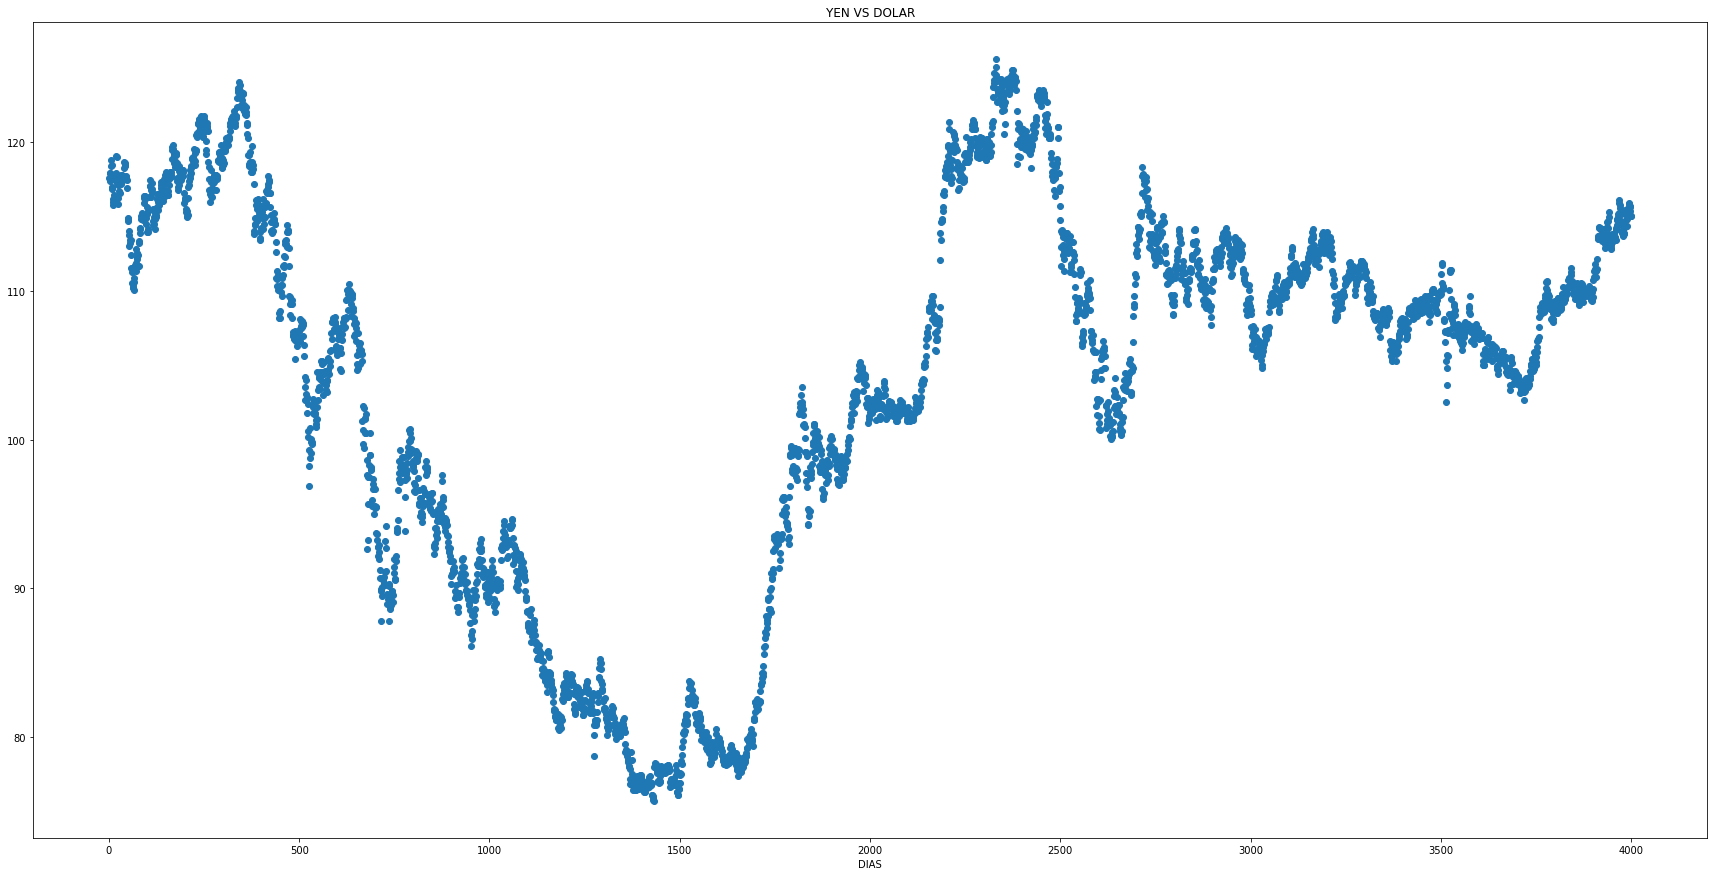

In [5]:
y = dat['JPUS'].values #datos originales del yen contra el dolar
X=dat['FECHA']#datos de fecha del 1 al 4000
fig,ax= plt.subplots(figsize=(30,15)) #graficar datos originales
#ax.set_ylim(bottom = 0, top=800)#limites de axis
ax.set_title('YEN VS DOLAR')#Titulos
ax.set_xlabel('DIAS')
#ax.set_ylabel('YEN AL DOLAR')
#ax.set_xlim(left = 0, right = 100
#ax.set_ylim(bottom = 1, top = 6)
ax.scatter(X,y) #dibujamos X y y


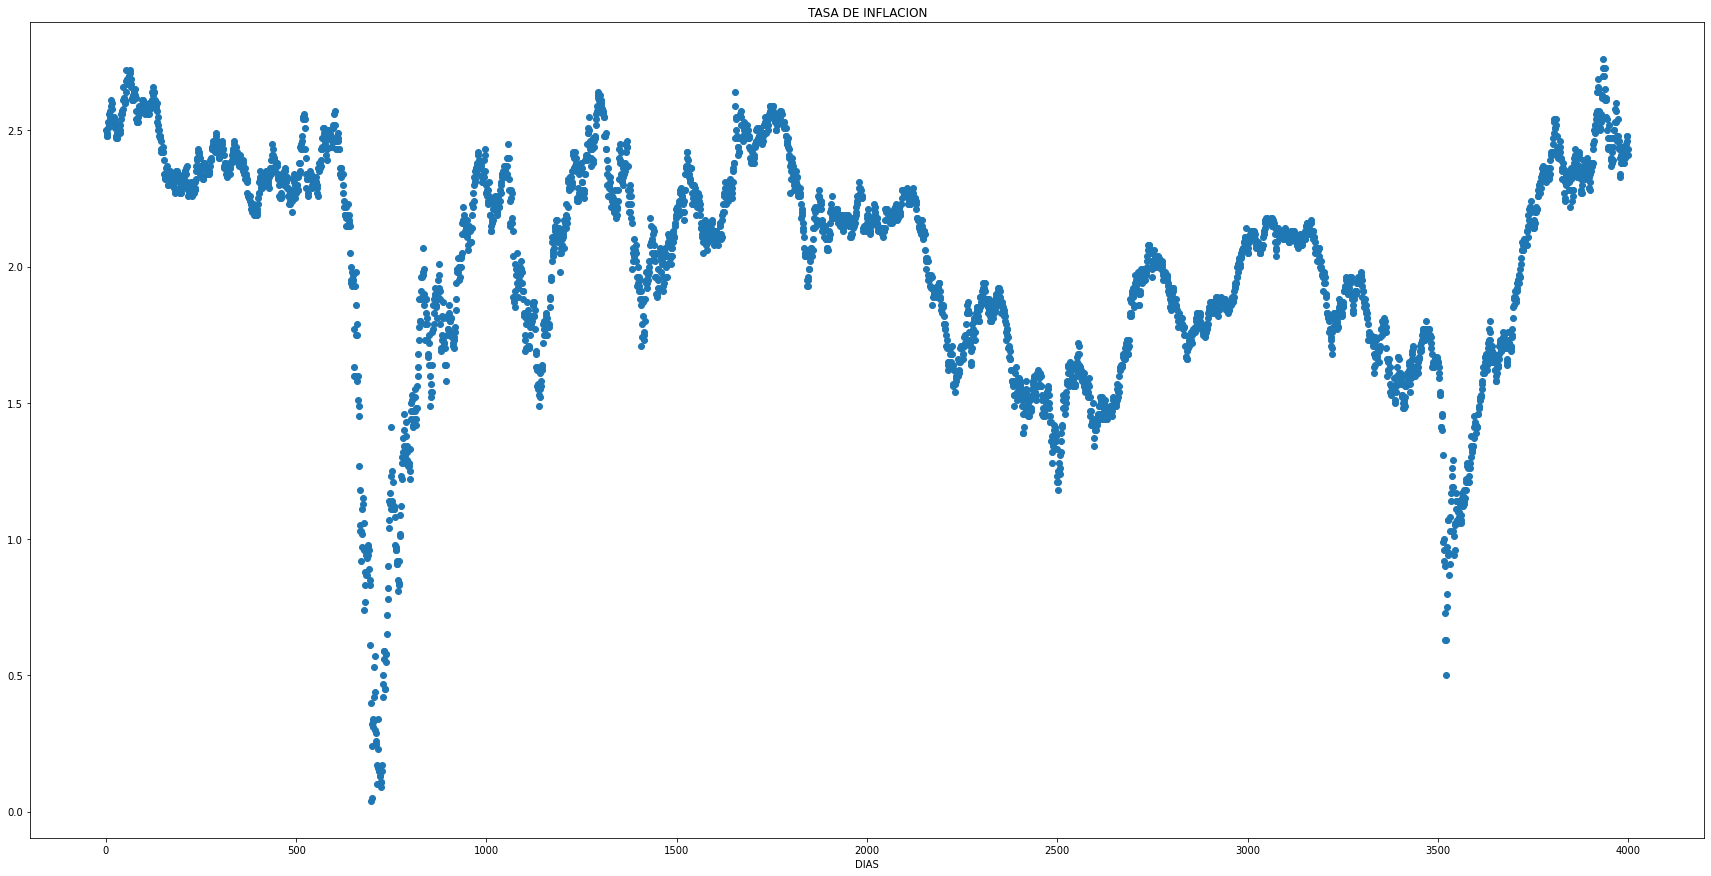

In [6]:

y = dat['TASAINF'].values #datos de la inflacion 
X=dat['FECHA']
fig,ax= plt.subplots(figsize=(30,15))
#ax.set_ylim(bottom = 0, top=800)#limites de axis
ax.set_title('TASA DE INFLACION')#Titulos
ax.set_xlabel('DIAS')
#ax.set_ylabel('YEN AL DOLAR')
#ax.set_xlim(left = 0, right = 100
#ax.set_ylim(bottom = 1, top = 6)
ax.scatter(X,y) #dibujamos X y y

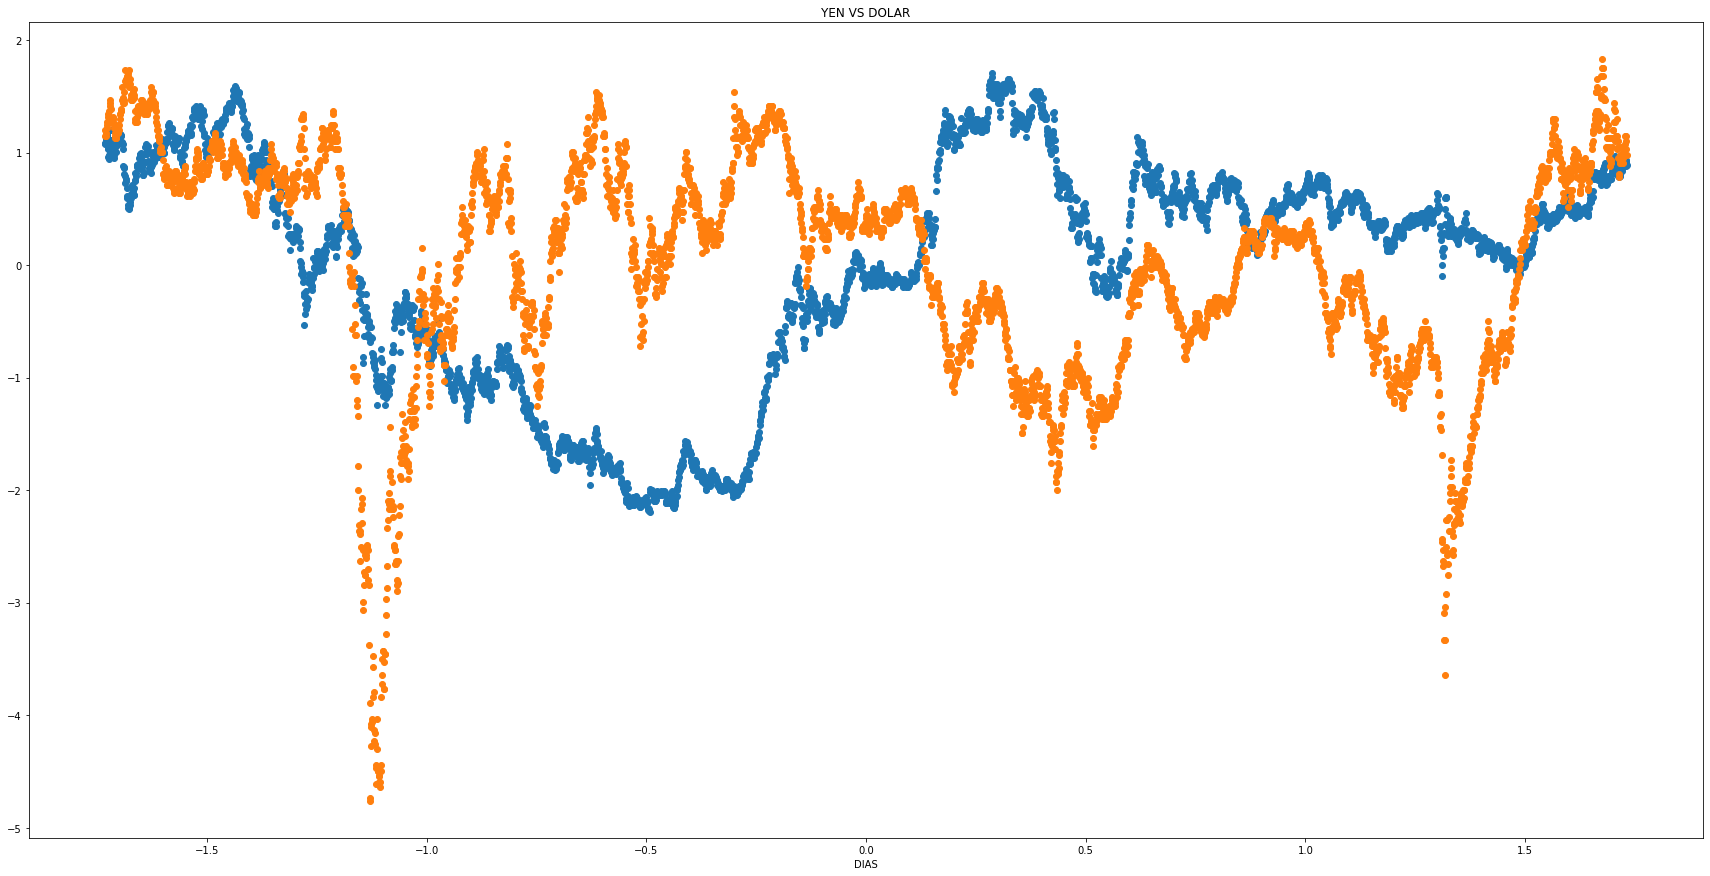

In [7]:
def normalize(x):               
    # it can also be done by using the scypy (stats) zscore
    mean = np.mean(x)#media
    sdeviation = np.std(x)
    y = (x-mean)/sdeviation
    return y


y = dat['JPUS'].values
y=normalize(y)
X=dat['FECHA']
X=normalize(X)
z=dat['TASAINF'].values
z=normalize(z)
fig,ax= plt.subplots(figsize=(30,15))
#ax.set_ylim(bottom = 0, top=800)#limites de axis
ax.set_title('YEN VS DOLAR')#Titulos
ax.set_xlabel('DIAS')
#ax.set_ylabel('YEN AL DOLAR')
#ax.set_xlim(left = 0, right = 100
#ax.set_ylim(bottom = 1, top = 6)
ax.scatter(X,y) #dibujamos X y y
ax.scatter(X,z) #dibujamos X y y

In [13]:
from sklearn import linear_model

Xaux=[] #vector de rangos en X
r=4 #cada cuantos datos aplico la regresion
w = dat['JPUS'].values #valores del yen vs el dolar
X=dat['FECHA'][:, np.newaxis] #valores de fecha en este caso de 0 a 4000
cord = [] #vector que guarda los valores de w cada rango para entrenar 
d=[]#vector que guarda los valores de X para entrenar
slope1=[] #vector que guarda los interceptos y las pendientes del rango seleccionado r
for i in range(0,len(w),r): #itero en la cantidad de datos en este caso w cada r  veces.
#ejemplo empiezo i=0, termina i=3999 cada 40 posiciones
  if cord!=[]:
   #print(cord)
   #print(d)
   ridge = linear_model.Ridge(alpha=0.001)#aplico modelo ridge
   ridge.fit(d, cord)#entreno ridge
   #print("Slope: "+str(ridge.coef_)+", intercept:"+str(ridge.intercept_))
   slope1.append([ridge.coef_[0][0],ridge.intercept_[0]])#lleno vector con pendiente e intercepto
   Xaux.append(i)#lleno vector de rangos X con la iteracion de acuerdo al r seleccionado
   #print(slope1)
   
   cord = []
   d=[]
  for p in range(i,i+r):#iteracion que arranca en el rango anterior y termina en el rango sumado el mismo ejemplo i=40 termina  en i=80 
    a=w[p]
    cord.append([a])#lleno vector cord con datos de w de acuerdo al rango seleccionado
    d.append(X[p]) #lleno vector d con los valores de fecha cada rango seleccionado ejemplo [0,40,80...]
#print(cord)
#print(d)
#aplico una vez mas el modelo y lleno los vectores ya que el for no me llena el ultimo dato incluido en los vectores de d y cord   
ridge = linear_model.Ridge(alpha=0.001)
ridge.fit(d, cord)
#print("Slope: "+str(ridge.coef_)+", intercept:"+str(ridge.intercept_))
slope1.append([ridge.coef_[0][0],ridge.intercept_[0]])
Xaux.append(4000) #lleno con el ultimo dato el vector de rangos 
#print(Xaux[:-1])
print(Xaux)
print(slope1)
len(slope1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400, 404, 408, 412, 416, 420, 424, 428, 432, 436, 440, 444, 448, 452, 456, 460, 464, 468, 472, 476, 480, 484, 488, 492, 496, 500, 504, 508, 512, 516, 520, 524, 528, 532, 536, 540, 544, 548, 552, 556, 560, 564, 568, 572, 576, 580, 584, 588, 592, 596, 600, 604, 608, 612, 616, 620, 624, 628, 632, 636, 640, 644, 648, 652, 656, 660, 664, 668, 672, 676, 680, 684, 688, 692, 696, 700, 704, 708, 712, 716, 720, 724, 728, 732, 736, 740, 744, 748, 752, 756, 760, 764, 768, 772, 776, 780, 784, 788, 792, 796, 800, 804, 808, 812, 816, 820, 

1000

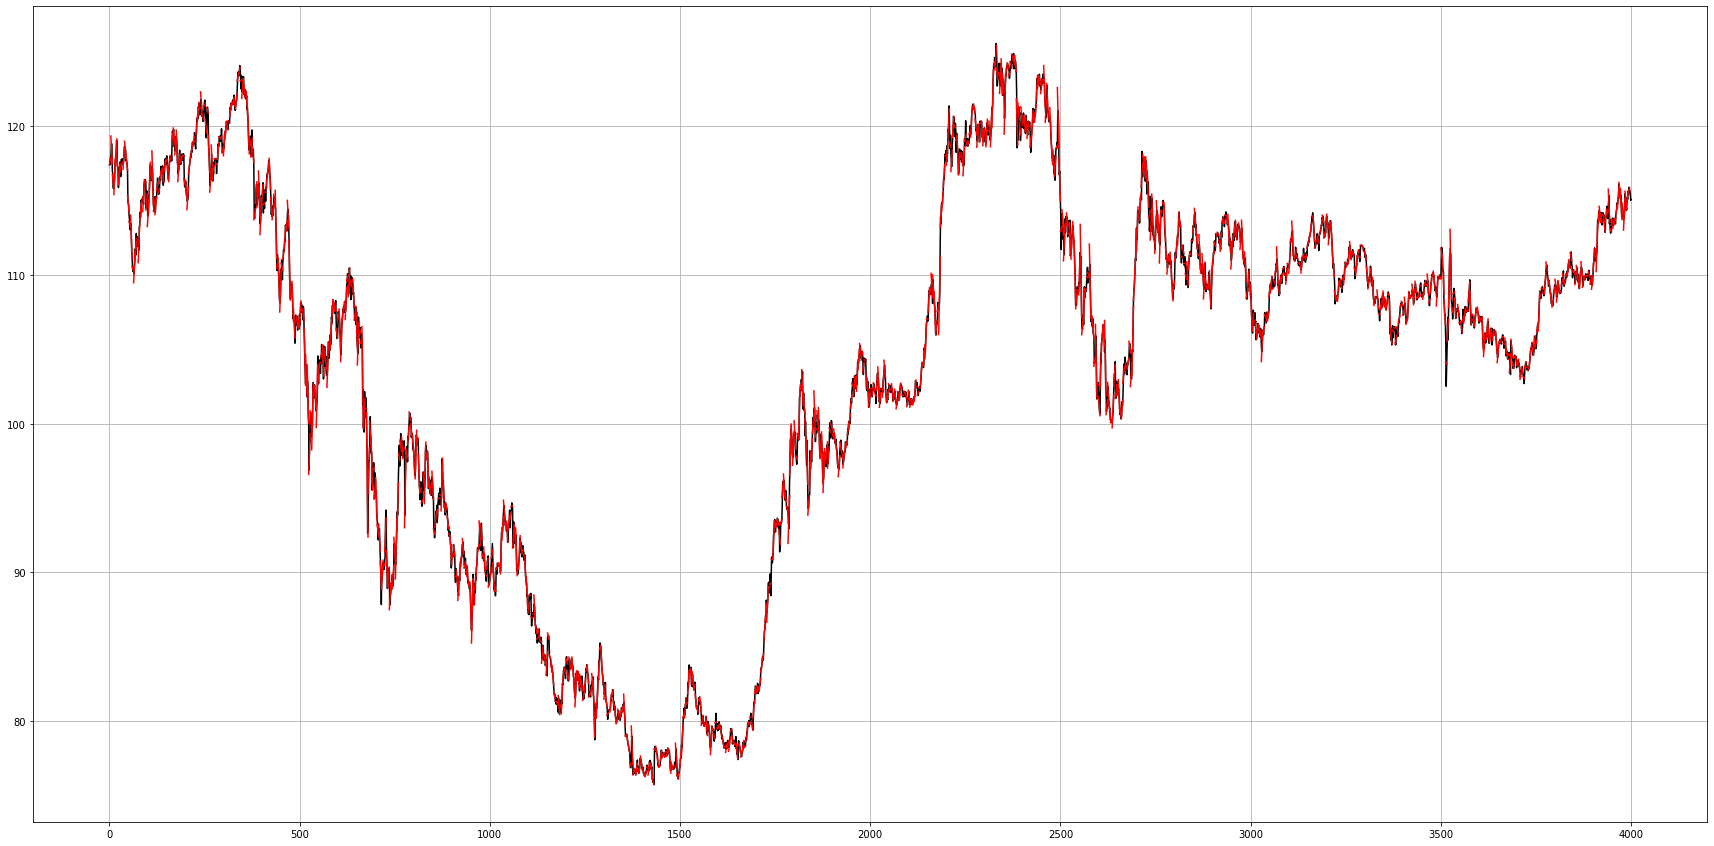

In [14]:
import numpy as np
import matplotlib.pyplot as plt

y = dat['JPUS'].values
X=dat['FECHA']#datos de fecha del 1 al 4000
fig,axs= plt.subplots(figsize=(30,15))
axs.plot(X,y,c='k') #graficamos valores originales

for i in range(999):
  x1 = Xaux[i]-4 #se resta el valor de r en este caso 40 para que tome el valor de 0 en la primera iteracion
  x2 = Xaux[i+1]-4 
  param=slope1[i]
  m=param[0]
  b=param[1]
  y1 = (m*x1)+b
  y2 = (m*x2)+b
  axs.plot([x1,x2],[y1,y2],c='r')#graficamos pendientes e interceptos en la grafica original 
  plt.grid()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

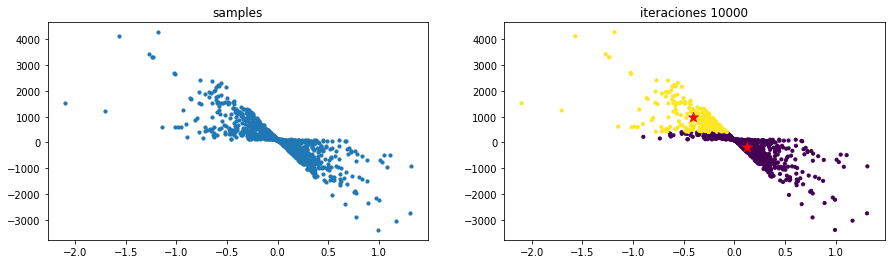

In [15]:
from sklearn import cluster
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

N_c = 2
color = ['y','m','k','r','b','c','g']


X= np.asarray(slope1)

'''dp_X=pd.DataFrame(X)
print(dp_X)
dp_X[0]=Xaux
dp_X[1]=colum
print(dp_X)
X=np.array(dp_X)'''
#X[0:]=colum
fig,axs = plt.subplots(1,2, figsize=(15,4))
#axs[0].scatter(Xaux,colum)
axs[0].scatter(X[:,0],X[:,1],s=10)
axs[0].set_title('samples')
for max_iter,fig in zip([10000],[1]):
  kmeans_clustering = KMeans(n_clusters=N_c, max_iter= max_iter, init='random')
  clusters = kmeans_clustering.fit_predict(X)
  print(clusters)
  axs[fig].set_title('iteraciones '+str(max_iter))
  axs[fig].scatter(X[:,0],X[:,1],c=clusters,s=10)
  clusters_center=kmeans_clustering.cluster_centers_
  axs[fig].scatter(clusters_center[:,0],clusters_center[:,1], marker='*',c='r',s=100)

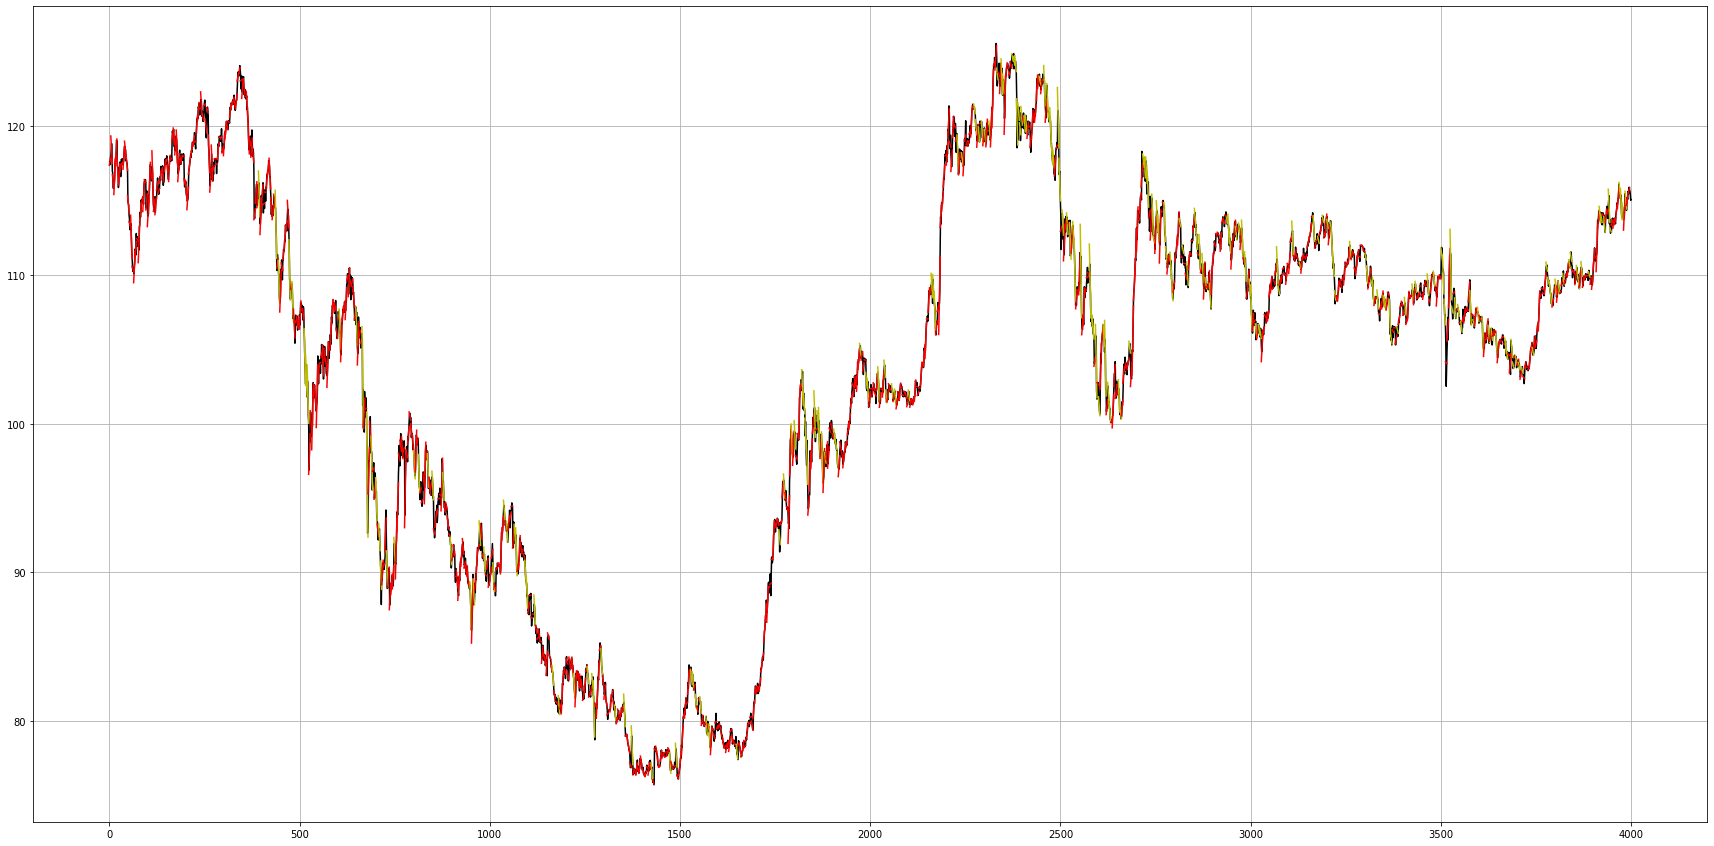

In [17]:
import numpy as np
import matplotlib.pyplot as plt

y = dat['JPUS'].values
X=dat['FECHA']#datos de fecha del 1 al 4000
fig,axs= plt.subplots(figsize=(30,15))
axs.plot(X,y,c='k') #graficamos valores originales

for i in range(999):
  x1 = Xaux[i]-4 #se resta el valor de r en este caso 40 para que tome el valor de 0 en la primera iteracion
  x2 = Xaux[i+1]-4 
  param=slope1[i]
  m=param[0]
  b=param[1]
  y1 = (m*x1)+b
  y2 = (m*x2)+b
  if clusters[i]==0:
    c='r'
  elif clusters[i]==1:
    c='y'
  axs.plot([x1,x2],[y1,y2],c=c)#graficamos pendientes e interceptos en la grafica original 
  plt.grid()



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 0 1 1 1 1 1 1 0 1 1 1 1 

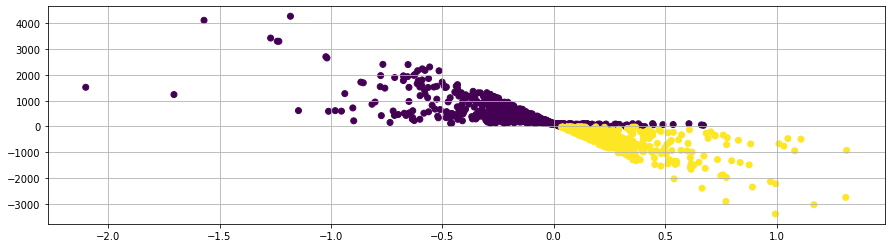

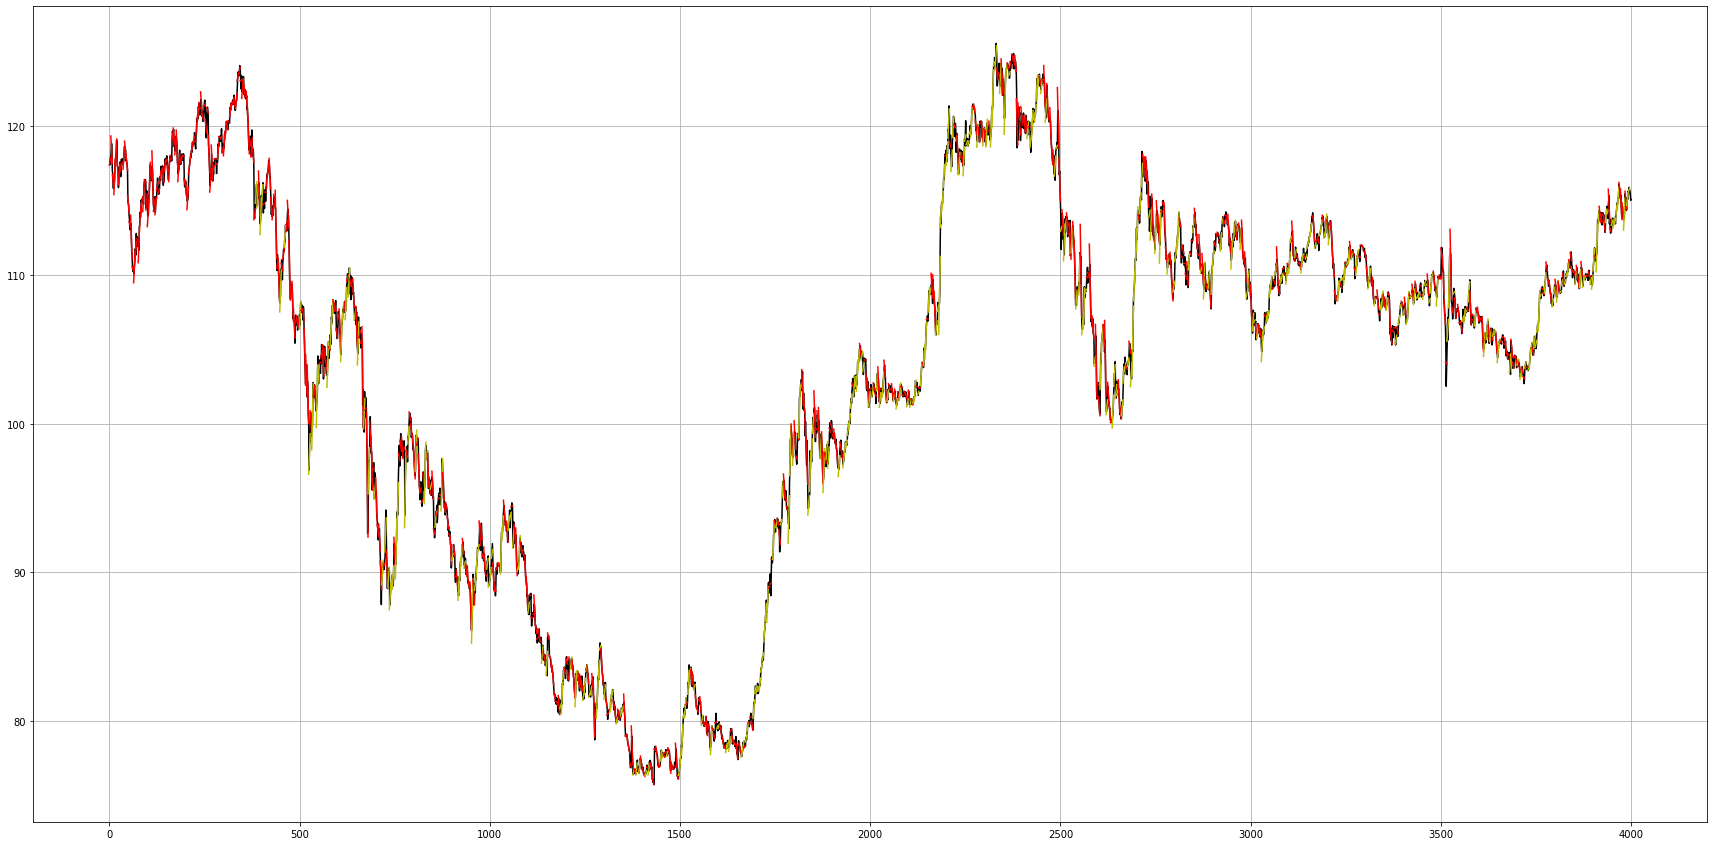

In [18]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


fig,axs = plt.subplots(figsize=(15,4))

X= np.asarray(slope1)
#X=np.array(dp_X)
agl_c = AgglomerativeClustering(n_clusters= 2)
clusters = agl_c.fit_predict(X)
print(clusters)
axs.scatter(X[:,0],X[:,1], c = clusters)
plt.grid()
import numpy as np
import matplotlib.pyplot as plt

y = dat['JPUS'].values
X=dat['FECHA']#datos de fecha del 1 al 4000
fig,axs= plt.subplots(figsize=(30,15))
axs.plot(X,y,c='k') #graficamos valores originales

for i in range(999):
  x1 = Xaux[i]-4 #se resta el valor de r en este caso 40 para que tome el valor de 0 en la primera iteracion
  x2 = Xaux[i+1]-4
  param=slope1[i]
  m=param[0]
  b=param[1]
  y1 = (m*x1)+b
  y2 = (m*x2)+b
  if clusters[i]==0:
    c='r'
  elif clusters[i]==1:
    c='y'
  axs.plot([x1,x2],[y1,y2],c=c)#graficamos pendientes e interceptos en la grafica original 
  plt.grid()

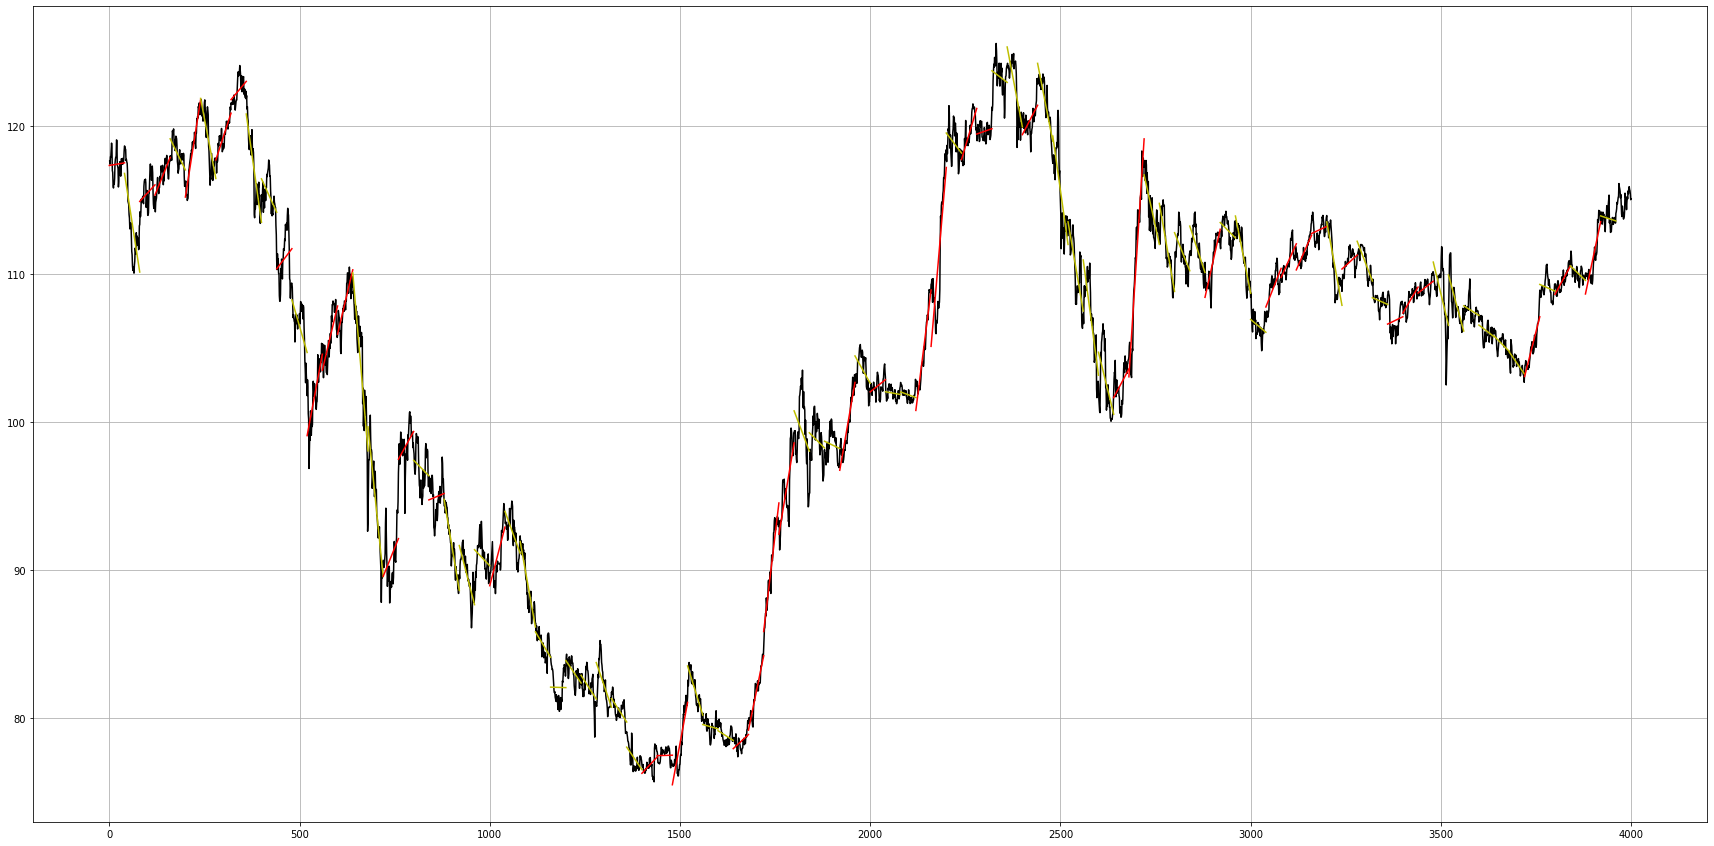

In [ ]:

y = dat['JPUS'].values
X=dat['FECHA']#datos de fecha del 1 al 4000
fig,axs= plt.subplots(figsize=(30,15))
axs.plot(X,y,c='k') #graficamos valores originales

for i in range(99):
  x1 = Xaux[i]-40 #se resta el valor de r en este caso 40 para que tome el valor de 0 en la primera iteracion
  x2 = Xaux[i+1]-40 
  param=slope1[i]
  m=param[0]
  b=param[1]
  y1 = (m*x1)+b
  y2 = (m*x2)+b
  if m>=0:
    c='r'
  elif m<0:
    c='y'
  axs.plot([x1,x2],[y1,y2],c=c)#graficamos pendientes e interceptos en la grafica original 
  plt.grid()